# PASO 0: importación de librerías necesarias

In [1]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# PASO 1: presentación y objetivos

El presente EDA toma como base de datos los libros registrados en la red social para lectores "Goodreads".

Con el siguiente análisis se pretende dar respuesta a las siguientes preguntas:

1. ¿Cuál es el género literario más leído?
2. ¿Existe alguna relación entre los géneros más leídos y los más publicados?
3. ¿Es el género literario más leído el mejor puntuado?
4. ¿Existe alguna relación entre los autores más publicados y los más leídos?
5. ¿Qué autores destacan en los géneros más leídos?
6. ¿Qué autores destacan en el género menos popular?

# PASO 2: limpieza y tratamiento de datos

In [2]:
# Convertimos la base de datos a dataframe
df_goodreads = pd.read_csv("./data/goodreads_data.csv")

In [3]:
# Vemos la información del dataframe
df_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


De esta primera lectura observamos que la columna "Description", que es la que presenta nulos, podemos borrarla ya que no aporta ninguna información necesaria a futuro.
Del mismo modo podemos eliminar la columna URL.

In [4]:
df_goodreads = df_goodreads.drop(columns=['Description','URL'])
df_goodreads.head()

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings
0,0,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311"
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135"
2,2,Pride and Prejudice,Jane Austen,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155"
3,3,The Diary of a Young Girl,Anne Frank,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438"
4,4,Animal Farm,George Orwell,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172"


En cuanto a la columna Num_Ratings debería ser de tipo int y no object, por lo que debemos realizar el cambio.

In [5]:
df_goodreads['Num_Ratings']

0       5,691,311
1       9,278,135
2       3,944,155
3       3,488,438
4       3,575,172
          ...    
9995          276
9996           60
9997          383
9998          263
9999           36
Name: Num_Ratings, Length: 10000, dtype: object

In [6]:
# Quitamos las comas y las sustituimos por nada:
df_goodreads['Num_Ratings'] = df_goodreads['Num_Ratings'].str.replace(',', '')

# Cambiamos el tipo a int.
df_goodreads['Num_Ratings'] = df_goodreads['Num_Ratings'].astype(int)

In [7]:
df_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Genres       10000 non-null  object 
 4   Avg_Rating   10000 non-null  float64
 5   Num_Ratings  10000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


Por otro lado, existe la posibilidad de que haya libros duplicados, por lo tanto debemos comprobarlo y así tratarlos.

In [8]:
duplicados = df_goodreads[df_goodreads.duplicated(subset = ['Book', 'Author'], keep = False)]
duplicados

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings
21,21,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963002
59,59,The Color Purple,Alice Walker,"['Classics', 'Fiction', 'Historical Fiction', ...",4.26,633920
125,125,The Last Lecture,Randy Pausch,"['Nonfiction', 'Memoir', 'Biography', 'Self He...",4.26,334149
134,134,"The Girl with the Dragon Tattoo (Millennium, #1)",Stieg Larsson,"['Fiction', 'Mystery', 'Thriller', 'Crime', 'M...",4.16,3029842
231,231,Speak,Laurie Halse Anderson,"['Young Adult', 'Fiction', 'Contemporary', 'Re...",4.04,565317
...,...,...,...,...,...,...
8467,8467,One Plus One,Jojo Moyes,"['Fiction', 'Romance', 'Chick Lit', 'Contempor...",3.96,166104
8608,8608,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186
8626,8626,Shakespeare's Sonnets,William Shakespeare,"['Poetry', 'Classics', 'Fiction', 'Romance', '...",4.22,2493
8678,8678,"The Oldest Dance (Wisdom Revolution, #2)",Misba,"['Fantasy', 'Science Fiction Fantasy', 'Post A...",4.48,5547


Existen 198 filas duplicadas como por ejemplo las que se muestran a continuación. 

In [9]:
libro_duplicado = df_goodreads[df_goodreads['Book'] == 'The Hunger Games (The Hunger Games, #1)']
libro_duplicado

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings
21,21,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963002
4868,4868,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186
4894,4894,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186
8608,8608,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186


In [10]:
libro_duplicado = df_goodreads[df_goodreads['Book'] == 'The Color Purple']
libro_duplicado

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings
59,59,The Color Purple,Alice Walker,"['Classics', 'Fiction', 'Historical Fiction', ...",4.26,633920
272,272,The Color Purple,Alice Walker,"['Classics', 'Fiction', 'Historical Fiction', ...",4.26,633926


Como podemos observar, lo más acertado sería quedarse con el último valor registrado que es el que presenta cambios.

In [11]:
df_goodreads = df_goodreads.drop_duplicates(subset=['Book', 'Author'], keep='last')

Usamos el ejemplo anterior para comprobar que nos hemos quedado con el valor deseado.

In [12]:
libro_duplicado = df_goodreads[df_goodreads['Book'] == 'The Color Purple']
libro_duplicado

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings
272,272,The Color Purple,Alice Walker,"['Classics', 'Fiction', 'Historical Fiction', ...",4.26,633926


Si volvemos a mirar los duplicados observamos que no aparece ninguno, por loq ue ya estarían corregidos.

In [13]:
duplicados = df_goodreads[df_goodreads.duplicated(subset = ['Book', 'Author'], keep = False)]
duplicados

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings


Como nuestro estudio necesita la columna "Genres" debemos centrarnos en ella.
Dicha columna está formada por una lista de distintos tipos de género, pero para poder hacer el análisis nos tenemos que quedar con el género predominante.

Vamos a suponer que el género principal es el primero que aparece y lo indicaremos en una nueva columna.

Para ello, es necesario generar una función como la siguiente

In [14]:
def obtener_primer_valor(x):
    try:
        lista = ast.literal_eval(x)  # Convertir la cadena a lista
        if len(lista) > 0:  # Verificar si la lista no está vacía
            return lista[0]  # Devolver el primer valor
        else:
            return None  # Si la lista está vacía, devolver None
    except (ValueError, SyntaxError):  # Capturar errores de conversión de cadenas no válidas
        return None  # Si la cadena no es válida, devolver None

# Aplicar la función a la columna
df_goodreads['Principal_Genre'] = df_goodreads['Genres'].apply(obtener_primer_valor)


In [15]:
df_goodreads.head(10)

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
0,0,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311,Classics
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,Fantasy
2,2,Pride and Prejudice,Jane Austen,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155,Classics
3,3,The Diary of a Young Girl,Anne Frank,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438,Classics
4,4,Animal Farm,George Orwell,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172,Classics
5,5,The Little Prince,Antoine de Saint-Exupéry,"['Classics', 'Fiction', 'Fantasy', 'Childrens'...",4.32,1924063,Classics
6,6,1984,George Orwell,"['Classics', 'Fiction', 'Science Fiction', 'Dy...",4.19,4201429,Classics
7,7,The Great Gatsby,F. Scott Fitzgerald,"['Classics', 'Fiction', 'School', 'Historical ...",3.93,4839642,Classics
8,8,The Catcher in the Rye,J.D. Salinger,"['Classics', 'Fiction', 'Young Adult', 'Litera...",3.81,3315881,Classics
9,9,The Lord of the Rings,J.R.R. Tolkien,"['Fantasy', 'Classics', 'Fiction', 'Adventure'...",4.52,644766,Fantasy


In [16]:
# Observamos cuáles son los valores de la nueva columna
df_goodreads['Principal_Genre'].value_counts()

Principal_Genre
Fiction               1689
Nonfiction             945
Fantasy                923
Classics               513
Historical Fiction     454
                      ... 
Fae                      1
Womens                   1
Military History         1
Wicca                    1
Civil War                1
Name: count, Length: 207, dtype: int64

Existe géneros que seguramente se puedan agrupar en otros, por ejemplo Military History o Civil War podrían ser libros de género Histórico o Fae podría ser fantasía.

In [17]:
# Observamos que libros son:
generos_filtrados = 'Fae', 'Womens', 'Military History', 'Wicca', 'Civil War'
df_goodreads[df_goodreads['Principal_Genre'].isin(generos_filtrados)]

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
9587,9587,Night of the Fae (Ana Martin #1),Lyneal Jenkins,"['Fae', 'Paranormal', 'Romance', 'Urban Fantas...",3.73,174,Fae
9666,9666,Roots and Shadows,Shashi Deshpande,['Womens'],3.26,139,Womens
9683,9683,Passchendaele: The Anatomy of a Tragedy,Andrew Macdonald,"['Military History', 'History']",4.00,16,Military History
9858,9858,Wicca: A Guide for the Solitary Practitioner,Scott Cunningham,"['Wicca', 'Nonfiction', 'Witchcraft', 'Spiritu...",4.02,18913,Wicca
9947,9947,What They Did There: Profiles from the Battle ...,Steve Hedgpeth,"['Civil War', 'History', 'Military Fiction', '...",3.97,178,Civil War


In [18]:
# Cambiamos los géneros a otros más comunes.
df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace({'Civil War': 'History', 'Military History': 'History'})

In [19]:
df_goodreads['Principal_Genre'].value_counts()

Principal_Genre
Fiction               1689
Nonfiction             945
Fantasy                923
Classics               513
Historical Fiction     454
                      ... 
Cultural                 1
Fae                      1
Horses                   1
Womens                   1
Wicca                    1
Name: count, Length: 205, dtype: int64

Como sigue habiendo muchos géneros con un solo valor vamos a analizar cuáles son para poder limpiarlo lo máximo posible.

In [20]:
# Obtener los valores con un recuento de 1
generos = df_goodreads['Principal_Genre'].value_counts()
generos_unicos = generos[generos == 1]

# Ver los valores con recuento 1
generos_unicos

Principal_Genre
Fairy Tales             1
Social Justice          1
Survival                1
Personal Development    1
Communication           1
                       ..
Cultural                1
Fae                     1
Horses                  1
Womens                  1
Wicca                   1
Name: count, Length: 75, dtype: int64

In [21]:
# Escogemos algunos ejemplos para ver si presentan otros géneros a los que poder asociarlos. En caso de que solo tengan un género no modificaremos nada.
generos_filtrados = 'Survival', 'Social Justice', 'Personal Development', 'High School', 'Magical Realism', 'Canada', 'Cooking', 'Horses'
df_goodreads[df_goodreads['Principal_Genre'].isin(generos_filtrados)]

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
570,570,Lies My Teacher Told Me: Everything Your Ameri...,James W. Loewen,"['Social Justice', 'History', 'Race', 'Audiobo...",3.97,66778,Social Justice
611,611,Walks Away Woman,Ki Longfellow,"['Survival', 'Adventure', 'Fiction', 'Novels',...",4.37,1143,Survival
805,805,"Take Command: Find Your Inner Strength, Build ...",Joe Hart,"['Personal Development', 'Self Help', 'Nonfict...",4.27,4498,Personal Development
2471,2471,Magic America,C.E. Medford,"['Magical Realism', 'Fantasy', 'Fiction', 'You...",3.82,356,Magical Realism
3529,3529,Being the Bad Boy's Victim,Claire Monette,"['High School', 'Contemporary', 'Romance', 'Sc...",3.79,319,High School
9353,9353,The Town That Drowned,Riel Nason,"['Canada', 'Young Adult', 'Historical Fiction'...",3.81,764,Canada
9455,9455,Tastes and Tales from Russia,Alla Danishevsky,"['Cooking', 'Food', 'Cookbooks']",4.50,12,Cooking
9610,9610,Casual Lies-A Triple Crown Adventure,Shelley Lee Riley,"['Horses', 'Animals', 'Nonfiction']",4.47,32,Horses


Para poder limpiar los datos usaremos dos técnicas.
* La primera consiste en reemplazar los valores actuales por los nuevos como si se tratara de un diccionario. Esto aplica a un género que es cambiado por otro.
* La segunda técnica consiste en cambiar varios géneros a la vez buscando patrpnes de texto

Nota: la elección de los géneros a los que se asigna se ha hecho manualmente ya que podría darse el caso de que se asigne a otro género y siga existiendo siempre ese género con 1 valor.

In [22]:
reemplazar = {'Social Justice': 'History','Survival': 'Adventure', 'Personal Development': 'Self Help',
              'High School': 'Romance', 'Canada': 'Historical Fiction', 'Comedy' : 'Humor','Judaism' : 'Religion',
               'Horses': 'Animals', 'Linguistics' : 'Linguistics', 'Transgender' : 'Memoir', 'Linguistics' : 'Philosophy',
             'Juvenile': 'Young Adult', 'Kids' : 'Childrens', 'Gaming' : 'Business', 'Suspense': 'Thriller', 'Light Novel' : 'Manga',
             'Architecture': 'Design', 'Shapeshifters' : 'Paranormal', 'comunication': 'Psychology', 'Gender': 'Feminism',
             'Pulp': 'Amazon', 'Marathi':'Mythology', 'Adult': 'New Adult', 'Anthropology': 'Essays', 'Ukrainian Literature': 'Classics',
             'Literary Criticism': 'Literature', 'Medicine': 'Medical', 'Portugal': 'Short Stories', 'Geology': 'Science' }

df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(reemplazar)

In [23]:
df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Love|Romance|Teen).*',  # Expresión regular para encontrar "love","romance", etc
    value='Romance',                   # Nuevo valor
    regex=True                         # Usar regex
)


df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Literary Fiction|Cyberpunk|Speculative Fiction|Womens Fiction|Russia|German Literature|African American|Indian Literature|Indian Literature ).*',  # Expresión regular para encontrar "love" o "romance"
    value='Fiction',                   
    regex=True                         
)


df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Magical Realism|Gods|Angels|Fae|Fairy Tales|Epic Fantasy|Lds).*',  
    value='Fantasy',                   
    regex=True                         
)

df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Cooking|Vegetarian).*', 
    value='Food',                   
    regex=True                        
)

df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Christian Non Fiction|Non Fiction|Race|Death|Film|Law|Martial Arts|Prayer).*', 
    value='Nonfiction',                   
    regex=True                         
)

In [24]:
generos = df_goodreads['Principal_Genre'].value_counts()
generos_unicos = generos[generos == 1]

# Ver los valores con recuento 1
generos_unicos.index

Index(['Communication', 'Gothic', 'Banned Books', 'Mathematics', 'Egypt',
       'Magic', 'Media Tie In', 'Abuse', 'Sustainability', 'Biography Memoir',
       'Amish', 'Adoption', 'Cultural', 'Womens', 'Wicca'],
      dtype='object', name='Principal_Genre')

Ahora solo tenemos 15 géneros con un único valor. Estos datos no podemos limpiarlos más ya que sólo tienen un género asignado.

# Paso 3: Tabla de variables

El DataFrame escogido se trata de una base de datos con 9896 filas y 7 columnas tras su limpieza.

Las variables que presenta y su contenido se muestra en la siguiente tabla:

| Columna/Variable | Descripción | Tipo | Prioridad |
| ---------------- | ----------- | ---- | --------- |
| Book       | Variable que indica el título del libro | Categórica | - |
| Author       | Variable que indica el autor del libro | Categórica | 2 |
| Genres       | Variable que indica una lista de los géneros atribuidos al libro | Categórica | - |
| Avg_Ratings       | Variable que indica la puntuación media que los lectores han dado al libro | Numérica | 1 |
| Num_Ratings       | Variable que indica el número de lectores del libro | Numérica | 1 |
| Principal_Genre       | Variable que indica el género principal del libro | Categórica | 1 |

Nota: en la tabla anterior el valor 1 representa la prioridad máxima.

# Paso 4: Hipótesis

Antes de comenzar con el análisis debemos tener muy claras las hipótesis y cuáles son nuestros objetivos a la hora de realizar el análisis.
Como ya hemos establecido los objetivos con anterioridad veamos cuáles son las hipótesis que tenemos a esas preguntas.

1. ¿Cuál es el género literario más leído?
   * **Hipótesis**: Romance y Fantasía

2. ¿Existe alguna relación entre los géneros más leídos y los más publicados?
    * **Hipótesis: sí, cuanto más leen un género más libros se publicaraán.

3. ¿Es el género literario más leído el mejor puntuado?
   * **Hipótesis** : sí, el género más leído es el mejor puntuado.


4. ¿ Existe alguna relación entre los autores más publicados y los más leídos?
   * **Hipótesis**: sí, cuanto más leen a un autor más libros se le publican.


5. ¿Qué autores destacan en los géneros más leídos?
   * **Hipótesis**: para 'Romance' Megan Maxwell o Alice Kellen y para Fantasía Sarah J. Mass.


6. ¿Qué autores destacan en el género menos popular?
   * **Hipótesis**: el género menos popular es poesía y su autor más popular Defreds.
     

# Paso 5: Análisis

> ## 5.1 Género literario más leído

Para saber cuáles son los géneros literario más leídos tenemos que tener en cuenta la columna 'Num_Rating' y sumarla en función del género. 

Vamos a obtener los datos de los 10 primeros para ver el top 10.

In [25]:
top_generos = df_goodreads.groupby('Principal_Genre')['Num_Ratings'].sum().sort_values(ascending=False).head(10)
top_generos

Principal_Genre
Fantasy               167314412
Fiction               163634569
Classics              128995818
Young Adult            93606541
Nonfiction             65674285
Historical Fiction     35463991
Romance                33837713
Mystery                28595690
Science Fiction        26162920
Horror                 19425880
Name: Num_Ratings, dtype: int64

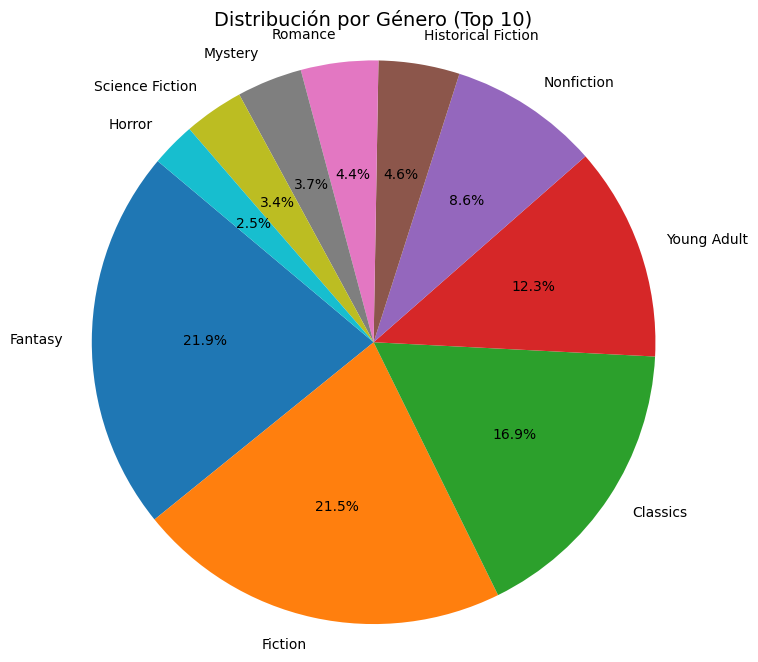

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(top_generos, labels=top_generos.index, autopct='%1.1f%%', startangle=140)

# Configurar título
plt.title('Distribución por Género (Top 10)', fontsize=14)
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

Tal y como esperábamos el **género** de **"Fantasía" es el más leído**, sin embargo "Romance" está en la 7 posición.

> ## 5.2 Relación entre géneros literarios más leídos y sus publicaciones.

In [27]:
# Obtenemos con cuántos géneros literarios nos hemos quedado:
genero_unicos = df_goodreads['Principal_Genre'].nunique()
genero_unicos

143

In [28]:
# Calculamos la cantidad de publicaciones en función de los géneros y los guardo en una variable
generos_mas_comunes = df_goodreads['Principal_Genre'].value_counts()
generos_mas_comunes

Principal_Genre
Fiction               1697
Nonfiction             952
Fantasy                930
Classics               514
Historical Fiction     455
                      ... 
Amish                    1
Adoption                 1
Cultural                 1
Womens                   1
Wicca                    1
Name: count, Length: 143, dtype: int64

In [29]:
# Calculamos de nuevo la cantidad de lecturas de cada género y lo guardamos en una variable.
cantidad_lecturas = df_goodreads.groupby('Principal_Genre')['Num_Ratings'].sum().sort_values(ascending=False)
cantidad_lecturas

Principal_Genre
Fantasy             167314412
Fiction             163634569
Classics            128995818
Young Adult          93606541
Nonfiction           65674285
                      ...    
Biography Memoir           20
Egypt                      17
Abuse                      14
Cultural                    5
Mathematics                 4
Name: Num_Ratings, Length: 143, dtype: int64

In [30]:
# Creamos un dataframe con ambas variables y calculamos la correlación
datos_correlacion = pd.DataFrame({
    'frecuencia': generos_mas_comunes,
    'cantidad_lecturas': cantidad_lecturas
}).dropna() 

correlacion = datos_correlacion.corr()

correlacion

,frecuencia,cantidad_lecturas
frecuencia,1.000000,0.901199
cantidad_lecturas,0.901199,1.000000


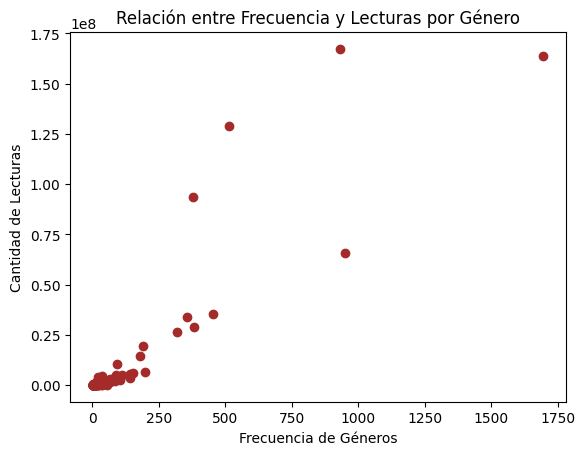

In [31]:
# Representación en un gráfico
plt.scatter(datos_correlacion['frecuencia'], datos_correlacion['cantidad_lecturas'], color='brown')
plt.xlabel('Frecuencia de Géneros')
plt.ylabel('Cantidad de Lecturas')
plt.title('Relación entre Frecuencia y Lecturas por Género');

La correlación obtenida es de 0,9 lo que significa que existe una **fuerte correlación positiva** entre los géneros más publicados y los más leídos.

Del mismo modo se puede observar en el gráfico donde se podría trazar una línea ascendente que marca dicha correlación.

> ## 5.3 Relación entre los géneros literarios más leídos y sus puntuaciones

A continuación vamos a observar qué sucede con las puntuaciones según los géneros principales.

In [32]:
media_valoraciones = df_goodreads.groupby('Principal_Genre')['Avg_Rating'].mean().head(10).sort_values(ascending = False)
media_valoraciones

Principal_Genre
Anthologies                4.580000
Animals                    4.316364
Artificial Intelligence    4.280000
Adventure                  4.278000
Amish                      4.200000
Amazon                     4.115000
Adoption                   4.070000
Abuse                      4.070000
Africa                     4.015000
Art                        3.871250
Name: Avg_Rating, dtype: float64

Si simplemente vemos cuáles son los géneros de mayor puntuación se verán favorecidos aquellos géneros que se leen menos ya que estarán influenciados por opiniones individuales

Por lo tanto, creamos un dataframe con los géneros más leídos y calculamos la puntuación media de dichos géneros.

In [33]:
cantidad_lecturas_top_10 = df_goodreads.groupby('Principal_Genre')['Num_Ratings'].sum().sort_values(ascending=False).head(10)
cantidad_lecturas_top_10

Principal_Genre
Fantasy               167314412
Fiction               163634569
Classics              128995818
Young Adult            93606541
Nonfiction             65674285
Historical Fiction     35463991
Romance                33837713
Mystery                28595690
Science Fiction        26162920
Horror                 19425880
Name: Num_Ratings, dtype: int64

In [34]:
df_filtrado = df_goodreads[df_goodreads['Principal_Genre'].isin(cantidad_lecturas_top_10.index)]
df_filtrado

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
0,0,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311,Classics
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,Fantasy
2,2,Pride and Prejudice,Jane Austen,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155,Classics
3,3,The Diary of a Young Girl,Anne Frank,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438,Classics
4,4,Animal Farm,George Orwell,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172,Classics
...,...,...,...,...,...,...,...
9985,9985,"Finding Me: A Decade of Darkness, A life Recla...",Michelle Knight,"['Nonfiction', 'True Crime', 'Memoir', 'Biogra...",4.15,26284,Nonfiction
9987,9987,Life at the Bottom: The Worldview That Makes t...,Theodore Dalrymple,"['Nonfiction', 'Politics', 'Sociology', 'Psych...",4.24,3191,Nonfiction
9991,9991,"The Evolution of Mara Dyer (Mara Dyer, #2)",Michelle Hodkin,"['Young Adult', 'Paranormal', 'Fantasy', 'Roma...",4.26,94298,Young Adult
9993,9993,Call To Crusade,Tom Vetter,"['Historical Fiction', 'Historical']",4.56,39,Historical Fiction


In [35]:
media_valoraciones = df_filtrado.groupby('Principal_Genre')['Avg_Rating'].mean().sort_values(ascending=False)
media_valoraciones

Principal_Genre
Fantasy               4.128613
Historical Fiction    4.081890
Nonfiction            4.066450
Romance               4.037528
Science Fiction       4.006906
Mystery               3.989661
Classics              3.975837
Young Adult           3.965462
Horror                3.940576
Fiction               3.937384
Name: Avg_Rating, dtype: float64

Como queremos saber si existe una correlacion entre géneros más leídos y sus puntuaciones generamos el siguiente gráfico:

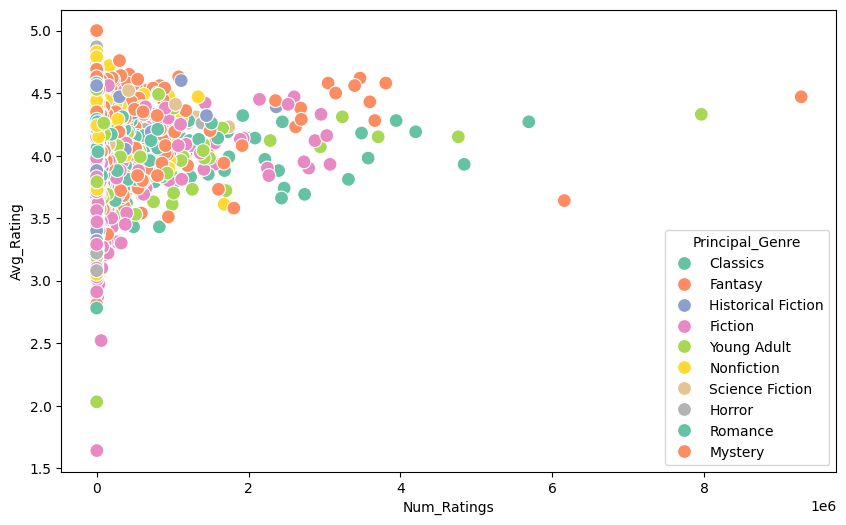

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='Num_Ratings', y='Avg_Rating', hue='Principal_Genre', palette='Set2', s=100);

Con el grafíco anterior obtenemos las siguientes conclusiones:
* La mayoría de los libros se puntúan entre 3,5 y 4,5.
* Existen outliers con puntuaciones por debajo de 2,5 y cerca de 5.
* La mayoría de los libros se concentran en la parte izquierda y hacia abajo del gráfico lo que indica que la mayoría de los libros tiene una puntuación relativamente baja.
* Existe un pequeño grupo de libros que tienen un alto número de calificaciones, por encima de 6 millones.
* A medida que aumenta el número de calificaciones, las puntuaciones comienzan a agruparse entorno a 3,5 y 4,5.
* Los libros con muy pocas calificaciones se ven más afectados por la influencia de opiniones individuales mostrando así más variabilidad.

Por otro lado, en cuanto a los géneros observamos que:
* Géneros como 'Fantasy' y 'Classics' presentan varios libros con un número muy alto de calificaciones.
* "Young Adult" y "Fantasy" parecen tener libros muy populares con buenas calificaciones promedio.
* Los géneros "Fiction" o "Nonfiction" parecen más dispersos, con más variedad en sus calificaciones promedio.

Obtener las puntuaciones medias de los géneros literarios más leídos.

In [37]:
# 1. Creamos un gráfico que una los generos más leidos y la media de valoraciones.
df_agg = pd.DataFrame({
    'Avg_Rating': media_valoraciones,
    'Num_Ratings': cantidad_lecturas_top_10})

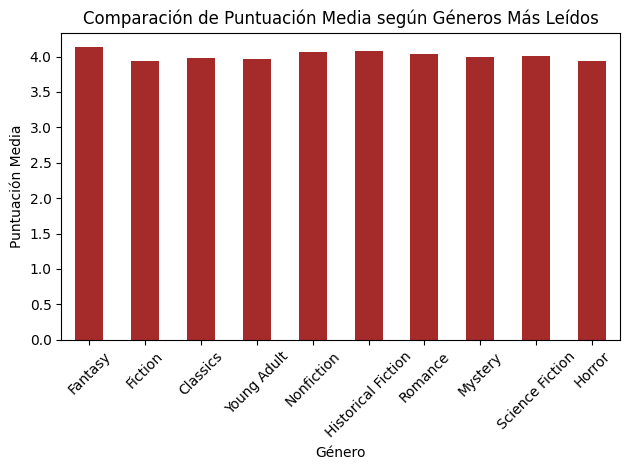

In [38]:
df_agg = df_agg.reset_index()
df_agg.sort_values('Num_Ratings', ascending=False).plot(kind='bar', x='Principal_Genre', y='Avg_Rating', legend=False, color='brown')
plt.title('Comparación de Puntuación Media según Géneros Más Leídos')
plt.xlabel('Género')
plt.ylabel('Puntuación Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Según el gráfico anterior observamos que todas las puntuaciones de los 10 géneros más leídos están alrededor de los 4 puntos. Esto significa que de media suelen estar bien valorados.

Pero para un análisis más completo es neccesario analizar esas puntuaciones con la cantidad de lectores que presentan.

In [39]:
# 1. Creamos un gráfico que una los generos más leidos y la media de valoraciones.
df_agg = pd.DataFrame({
    'Avg_Rating': media_valoraciones,
    'Num_Ratings': cantidad_lecturas_top_10})

df_agg

,Avg_Rating,Num_Ratings
Principal_Genre,,
Classics,3.975837,128995818
Fantasy,4.128613,167314412
Fiction,3.937384,163634569
Historical Fiction,4.081890,35463991
Horror,3.940576,19425880
Mystery,3.989661,28595690
Nonfiction,4.066450,65674285
Romance,4.037528,33837713
Science Fiction,4.006906,26162920


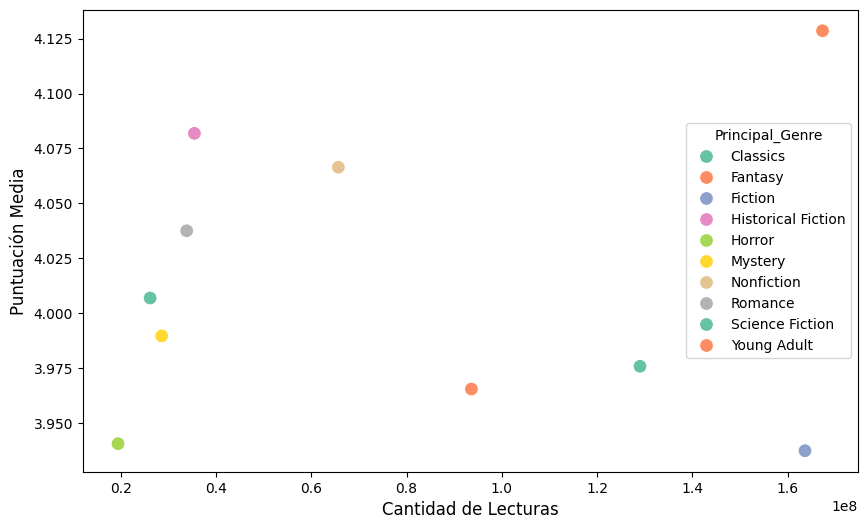

In [40]:
# 2. Creamos el diagrama de dispersión.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x='Num_Ratings', y='Avg_Rating', hue=df_agg.index, palette='Set2', s=100)
plt.xlabel('Cantidad de Lecturas', fontsize=12)
plt.ylabel('Puntuación Media', fontsize=12);

En este gráfico destaca el género 'Fantasy' como el mejor valorado y el más leído, mientras que 'Fiction' a pesar de ser de los más leídos es de los peores puntuados.

También observamos que géneros como 'Horror' son menos leídos y también peor puntuados y otros como 'Young Adult' o 'Science Fiction' a pesar de tener gran popularidad no consiguen llegar a los 4 puntos de valoración.

Además encontramos dos claros grupos, los que son leidos por mas de 100 millones de personas y los que no,
En el primer grupo destaca el género 'Horror' como el peor puntuado y el menos leído. Por otro lado, 'Historical Fiction' y Nonfiction' son los más leídos y los mejores puntuados.

En el segundo grupo destaca 'Fantasy' como el género más leído y mejor puntuado.
En este grupo encontramos que, excepto el género anterior, se puntuan mucho peor.

Podemos mirar relaciones entre autores y mejores puntuaciones o que autores tienen mas publicaciones

> ## 5.4 Relación entre autores literarios más publicados y más leídos

In [41]:
# Antes de comenzar veamos cuántos autores tenemos en la base de datos.
autores = df_goodreads['Author'].nunique()
autores

6064

In [42]:
# 1. Obtenemos cuáles son los autores que más libros publicados tienen.
autores_publicados = df_goodreads['Author'].value_counts()
autores_publicados

Author
Stephen King           56
William Shakespeare    38
Terry Pratchett        35
Agatha Christie        33
Anonymous              28
                       ..
Melton A. McLaurin      1
William R. Clark        1
Duran Price             1
Alex Cuoco              1
Julianna Boyer          1
Name: count, Length: 6064, dtype: int64

In [43]:
mediana_autores = autores_publicados.median()
mediana_autores

np.float64(1.0)

In [44]:
mediana_autores = autores_publicados.mean()
mediana_autores

np.float64(1.6319261213720317)

Tanto la mediana como la media nos indica que todos los autores al menos han publicado un libro, lo cual era obvio porque si no, no sería posible que las personas los leyesen y los puntuasen.
Además la media, que está en torno a 1,6, indica que la mayoría de autores tiene 1 libro publicado siendo excepciones los que han publicado más de dicha cifra.

In [45]:
# 2. Obtenemos cuáles son los autores que más leídos.
autores_mas_leidos = df_goodreads.groupby('Author')['Num_Ratings'].sum().sort_values(ascending = False)
autores_mas_leidos

Author
J.K. Rowling            31887199
Suzanne Collins         22791693
Stephen King            13613345
Stephenie Meyer         12846679
Rick Riordan            10831907
                          ...   
Alejandra Campos               0
Cale Rainer                    0
Franz Josef Kaps               0
Brooksie D. Thompson           0
Zoe Moor                       0
Name: Num_Ratings, Length: 6064, dtype: int64

In [46]:
# 3. Unimos ambos datafarmes para obtener la correlacion.
df_autores = pd.DataFrame({
    'publicaciones': autores_publicados,
    'lecturas': autores_mas_leidos
})

# 4. Obtenemos la correlacion
correlacion = round(df_autores['publicaciones'].corr(df_autores['lecturas']),2)
correlacion

np.float64(0.51)

Text(0, 0.5, 'Número de Publicaciones')

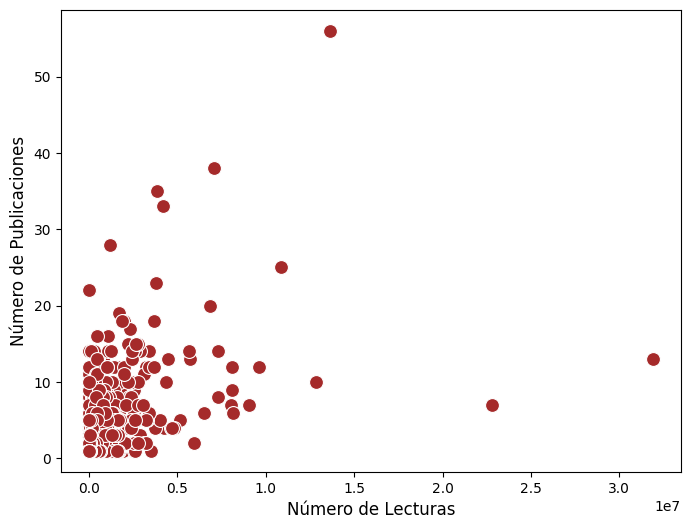

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_autores, x='lecturas', y='publicaciones', s=100, color='brown')
plt.xlabel('Número de Lecturas', fontsize=12)
plt.ylabel('Número de Publicaciones', fontsize=12)

La correlacion obtenida es de 0,51. Esto significa que existe una correlacion positiva moderada. Es decir, podríamos determinar que cuanto más publiquen a un autor, más libros se van a leer. Sin embargo, al ser moderada no quiere decir que esto sea determinante, sino que existirán otras causas que hagan que los libros sean más leídos. Dichas causas podrían ser los géneros, la publicidad que les den, etc.

> ## 5.5 Autores más leídos en los géneros más populares

Tal y como se observó con anterioridad los géneros que más lectores presentan son 'Fantasy' y 'Fiction', pero observamos que cada uno de ellos tenía puntuaciones muy diferentes.

Es por ello, que procederemos a un análisis individual de cada tipo para ver sus autores y las puntuaciones.

>> ## Autores más leídos en 'Fantasy'

In [48]:
# 1. Obtenemos un dataframe que contenga todos los libros del género fantasía.
df_fantasy = df_goodreads[df_goodreads['Principal_Genre'] == 'Fantasy']

# 2. Lo ordenamos para obtener cuáles son los 5 libros más leídos.
df_fantasy_top5 = df_fantasy.sort_values(by= 'Num_Ratings', ascending = False).head(5)

df_fantasy_top5

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,Fantasy
77,77,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,"['Fantasy', 'Young Adult', 'Romance', 'Fiction...",3.64,6158643,Fantasy
26,26,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.58,3808160,Fantasy
22,22,"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,"['Fantasy', 'Classics', 'Fiction', 'Adventure'...",4.28,3662325,Fantasy
84,84,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.43,3597747,Fantasy


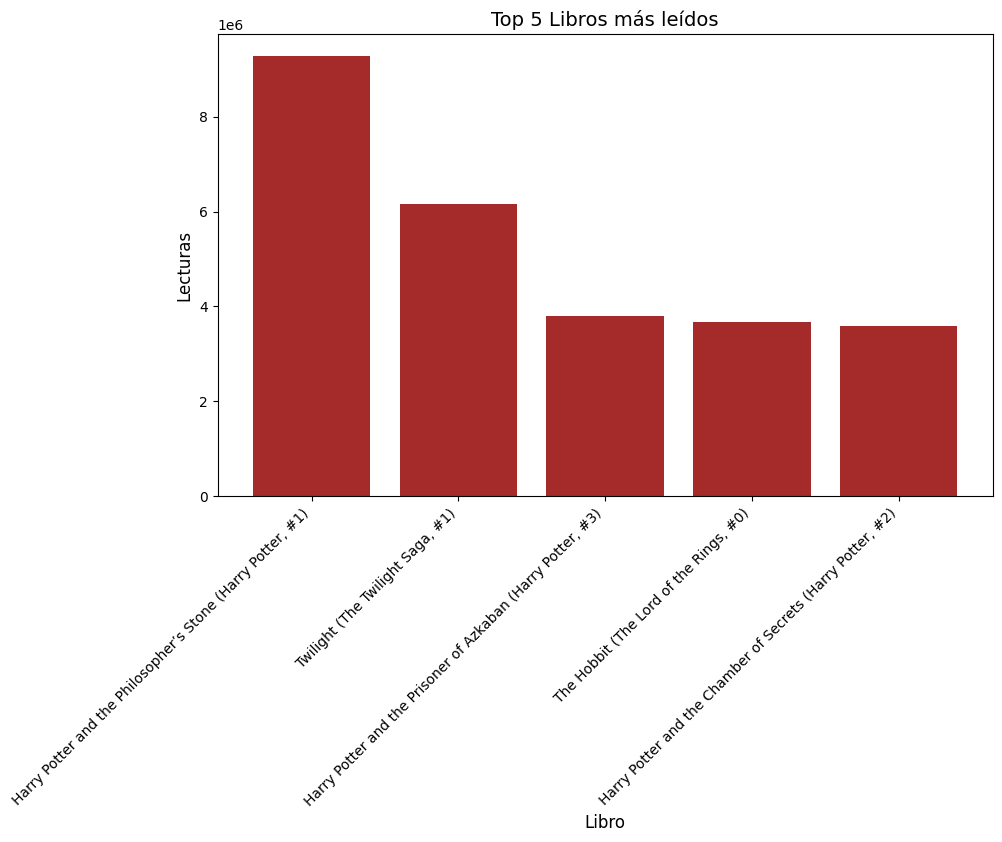

In [49]:
# 3. Creamos el gráfico de barras.
plt.figure(figsize=(10, 6))
plt.bar(df_fantasy_top5['Book'], df_fantasy_top5['Num_Ratings'], color='brown')

# Títulos y etiquetas
plt.title('Top 5 Libros más leídos', fontsize=14)
plt.xlabel('Libro', fontsize=12)
plt.ylabel('Lecturas', fontsize=12)

#  Rotar los títulos de los libros para mejor visibilidad
plt.xticks(rotation=45, ha='right');

Tras un primer análisis observamos que 3 de los 5 libros de Fantasía más populares pertenecen a la autora J.K. Rowling.
Pero, ¿será también la autora más leída de ese género? ¿Y la mejor puntuada?

Comencemos con el primero de estos análisis.

In [50]:
autores_fantasy = df_fantasy.groupby('Author')['Num_Ratings'].sum().sort_values(ascending = False).head (5)
autores_fantasy

Author
J.K. Rowling       31536161
Rick Riordan       10749212
Stephenie Meyer     9807419
J.R.R. Tolkien      9612192
Sarah J. Maas       8107675
Name: Num_Ratings, dtype: int64

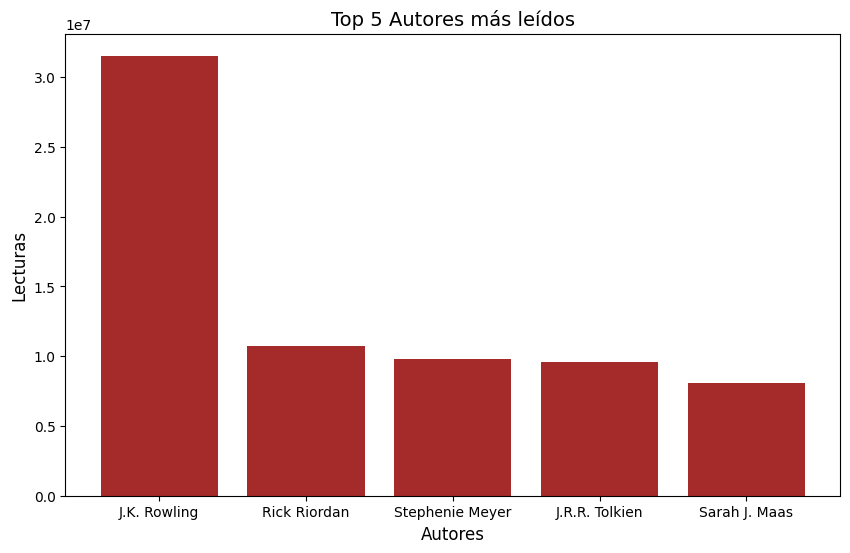

In [51]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(autores_fantasy.index, autores_fantasy.values, color='brown')

# Títulos y etiquetas
plt.title('Top 5 Autores más leídos', fontsize=14)
plt.xlabel('Autores', fontsize=12)
plt.ylabel('Lecturas', fontsize=12);



En este caso han aparecido autores como Rick Riordan y Sarah J.Mass entre los más leídos. Sin embargo, J.K. Rowling muestra una gran ventaja respecto a los demás.

Ahora bien, puede que estos autores sean los más leídos pero, ¿son los mejor puntuados?

In [52]:
autores_fantasy_puntuacion = df_fantasy.groupby('Author')['Avg_Rating'].mean().sort_values(ascending = False).head (5)
autores_fantasy_puntuacion

Author
iLana Markarov        5.00
Ruth Watson-Morris    4.73
R.R. Virdi            4.69
Marie Astor           4.69
Angelika Meyer        4.66
Name: Avg_Rating, dtype: float64

Como vemos, ninguno de los autores más leídos está dentro de los 5 mejor puntuados. Esto se debe a que cuanta más gente te lee y más libros publicados tienes, la puntuación se ve más distribuida que para otros autores que solo tengan un libro publicado y con buena puntuación.

Veamos que puntuaciones medias tienen los autores más leídos.

In [53]:
autores_seleccionados = ['J.K. Rowling', 'Rick Riordan', 'Sarah J. Maas', 'Stephenie Meyer', 'J.R.R. Tolkien']
df_autores = df_fantasy[df_fantasy['Author'].isin(autores_seleccionados)]
autores_fantasy_puntuacion = df_autores.groupby('Author')['Avg_Rating'].mean().sort_values(ascending=False)
autores_fantasy_puntuacion

Author
J.K. Rowling       4.371818
Sarah J. Maas      4.370000
Rick Riordan       4.336250
J.R.R. Tolkien     4.290833
Stephenie Meyer    3.836667
Name: Avg_Rating, dtype: float64

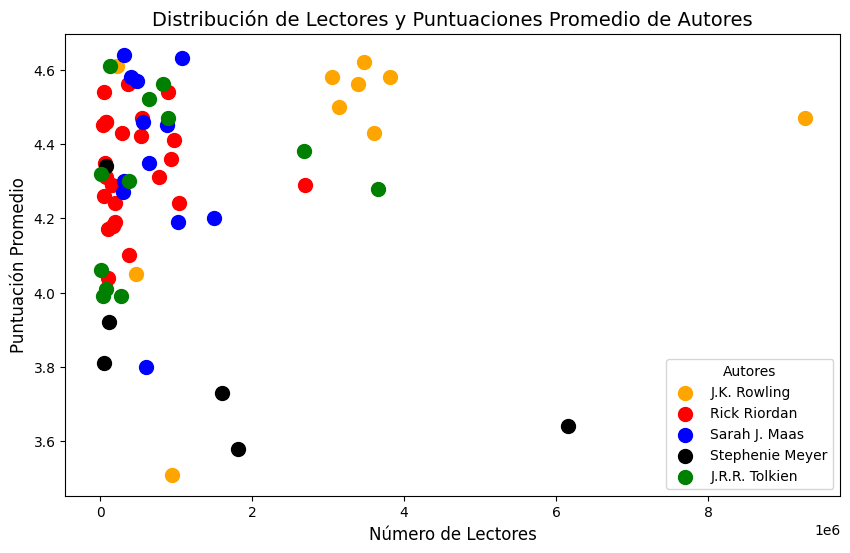

In [54]:
plt.figure(figsize=(10, 6))
colores = {'J.K. Rowling': 'orange', 'Rick Riordan': 'red','Sarah J. Maas': 'blue','Stephenie Meyer': 'black', 'J.R.R. Tolkien' : 'green'}

for autor, color in colores.items():
    df_autor = df_autores[df_autores['Author'] == autor]
    plt.scatter(df_autor['Num_Ratings'], df_autor['Avg_Rating'], color=color, s=100, label=autor)

plt.title('Distribución de Lectores y Puntuaciones Promedio de Autores', fontsize=14)
plt.xlabel('Número de Lectores', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)

plt.legend(title="Autores")

Podemos obtener las siguientes conclusiones:
1. J.K.Rowling se sitúa entre las mejor puntuadas, seguida por Sarah J.Mass.
2. Rick Riordan es el que más libros ha publicado superando todos ellos la puntuación de 4.
3. Stephanie Meyer tiene libros muy populares pero no muy bien valorados.
4. J.R.R. Tolkien ha escrito libros peor puntuados que los de Sarah J.Mass pero más populares.

>> ### Relación entre las puntuaciones de los lectores y la cantidad de lecturas del género 'Fantasy'

Para obtener una visión más general de este género literario procedemos a analizar si existe algún tipo de correlación entre las puntuaciones que dan los lectores y el número de lecturas.

Text(0, 0.5, 'Puntuación Promedio')

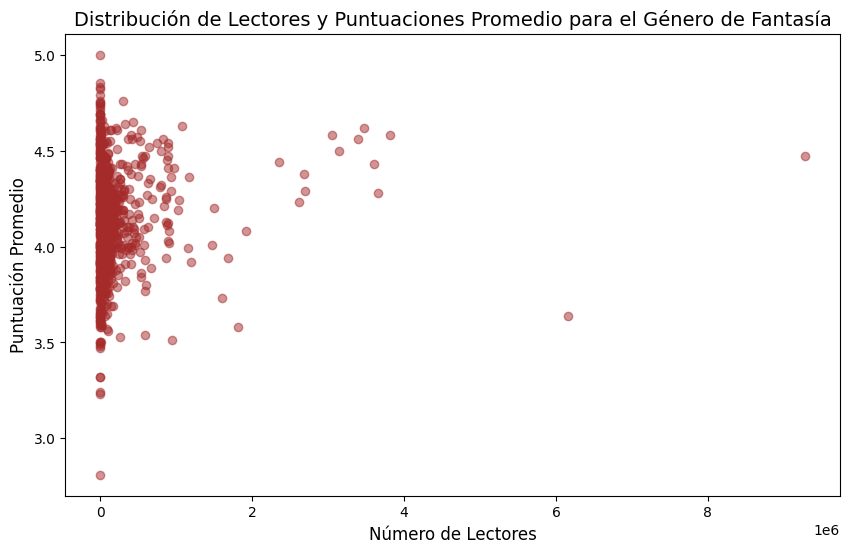

In [55]:
plt.figure(figsize=(10, 6))

# Graficar los puntos: eje X = 'Num_Ratings' (lecturas), eje Y = 'Avg_Rating' (puntuación promedio)
plt.scatter(df_fantasy['Num_Ratings'], df_fantasy['Avg_Rating'], color='brown', alpha=0.5)

# Título y etiquetas
plt.title('Distribución de Lectores y Puntuaciones Promedio para el Género de Fantasía', fontsize=14)
plt.xlabel('Número de Lectores', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)

Por lo tanto, las conclusiones dentro del género 'Fantasy' son las siguientes:
* La mayoría de los libros de este género tienen un número reducido de lectores, lo que indica que la mayoría de dichos libros no son muy populares en cuanto al número de calificaciones.
* La mayoría de las puntuaciones promedio oscilan entre 3,5 y 4,5, lo que implica que los libros de fantasía tienden a estar bien valorados.
* En cuanto a los outliers observamos que hay libros muy populares, con más de 6 millones de lectores los cuales presentan puntuaciones altas.
* Los libros con menos lectores tienen mayor dispersión oscilando sus puntuaciones entre 3 y 5, esto podría indicar que cuanto menos leído es un libro más influenciado puede estar por opiniones individuales extremas.


In [56]:
df_fantasy_col = df_fantasy[['Num_Ratings', 'Avg_Rating']]
correlacion = df_fantasy_col['Num_Ratings'].corr(df_fantasy_col['Avg_Rating'])
correlacion

np.float64(0.10904731860842111)

En cuanto a su correlación existe una correlación positiva muy débil, lo que sugiere que haya otros factores que influyan en las puntuaciones promedio tales como opiniones individuales, campañas de marketing, calidad subjetiva, etc.

>> ## Autores más leídos en 'Fiction'

El género 'Fiction' se situaba como el segundo más leído pero sus puntuaciones eran significativamente peores al 'género Fantasy'

In [57]:
# 1. Obtenemos un dataframe que contenga todos los libros del género fiction.
df_fiction = df_goodreads[df_goodreads['Principal_Genre'] == 'Fiction']

# 2. Lo ordenamos para obtener cuáles son los 5 libros más leídos.
df_fiction_top5 = df_fiction.sort_values(by= 'Num_Ratings', ascending = False).head(5)

df_fiction_top5

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
270,270,"Angels & Demons (Robert Langdon, #1)",Dan Brown,"['Fiction', 'Mystery', 'Thriller', 'Mystery Th...",3.93,3073715,Fiction
4223,4223,"The Girl with the Dragon Tattoo (Millennium, #1)",Stieg Larsson,"['Fiction', 'Mystery', 'Thriller', 'Crime', 'M...",4.16,3029885,Fiction
16,16,The Kite Runner,Khaled Hosseini,"['Fiction', 'Historical Fiction', 'Classics', ...",4.33,2954721,Fiction
357,357,Gone Girl,Gillian Flynn,"['Fiction', 'Mystery', 'Thriller', 'Mystery Th...",4.12,2874971,Fiction
40,40,The Alchemist,Paulo Coelho,"['Fiction', 'Classics', 'Fantasy', 'Philosophy...",3.90,2792673,Fiction


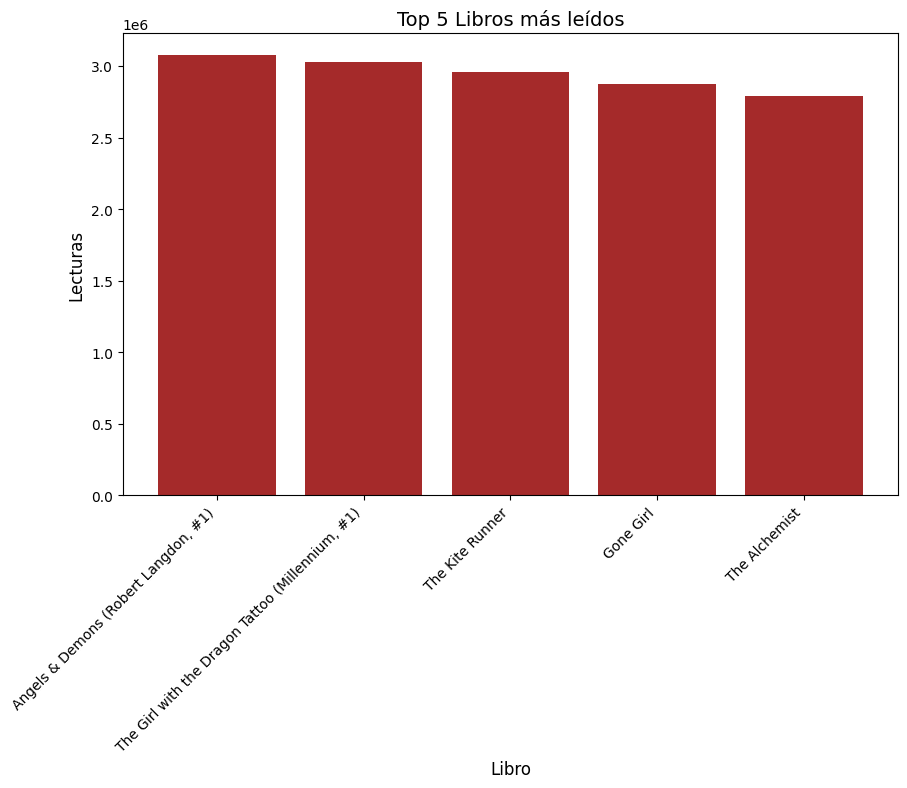

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(df_fiction_top5['Book'], df_fiction_top5['Num_Ratings'], color='brown')

# Títulos y etiquetas
plt.title('Top 5 Libros más leídos', fontsize=14)
plt.xlabel('Libro', fontsize=12)
plt.ylabel('Lecturas', fontsize=12)

#  Rotar los títulos de los libros para mejor visibilidad
plt.xticks(rotation=45, ha='right');

En este caso el género 'Fiction' presenta una mayor distribución de autores entre los libros más leídos.

In [59]:
# Autores más populares
autores_fiction = df_fiction.groupby('Author')['Num_Ratings'].sum().sort_values(ascending = False).head (5)
autores_fiction

Author
Dan Brown          8021812
Khaled Hosseini    4736667
Stieg Larsson      4688464
John Grisham       3708256
Paulo Coelho       3669968
Name: Num_Ratings, dtype: int64

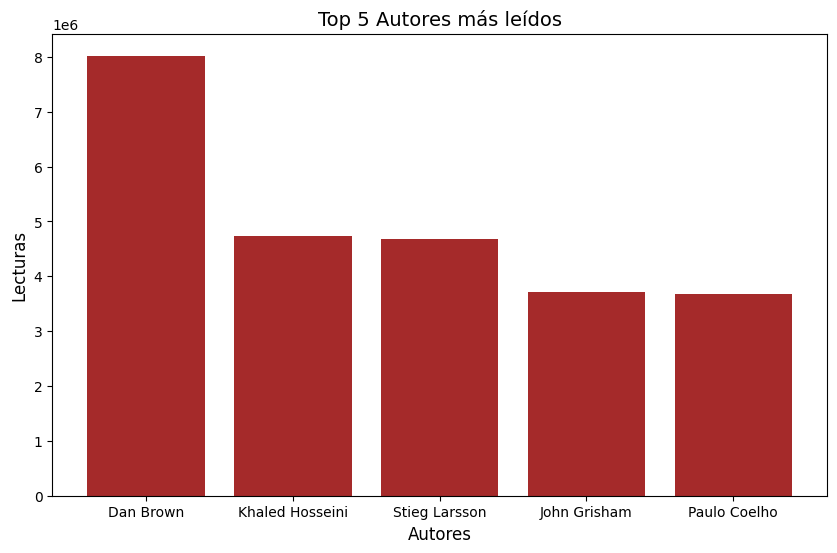

In [71]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(autores_fiction.index, autores_fiction.values, color='brown')

# Títulos y etiquetas
plt.title('Top 5 Autores más leídos', fontsize=14)
plt.xlabel('Autores', fontsize=12)
plt.ylabel('Lecturas', fontsize=12);

In [60]:
# Puntuación de los autores más populares
autores_seleccionados_fiction = ['Dan Brown', 'Stieg Larsson', 'Taylor Jenkins Reid', 'Khaled Hosseini', 'John Grisham']
df_autores_fiction = df_fiction[df_fiction['Author'].isin(autores_seleccionados_fiction)]
autores_fiction_puntuacion = df_autores_fiction.groupby('Author')['Avg_Rating'].mean().sort_values(ascending=False)
autores_fiction_puntuacion

Author
Taylor Jenkins Reid    4.345000
Stieg Larsson          4.275000
Khaled Hosseini        4.273333
John Grisham           3.860455
Dan Brown              3.822857
Name: Avg_Rating, dtype: float64

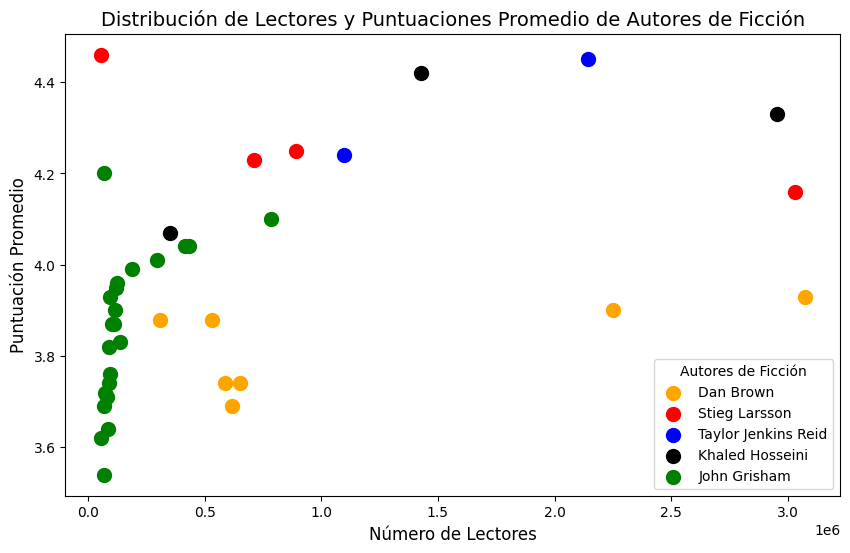

In [61]:
plt.figure(figsize=(10, 6))
colores = {'Dan Brown': 'orange', 'Stieg Larsson': 'red','Taylor Jenkins Reid': 'blue','Khaled Hosseini': 'black', 'John Grisham' : 'green'}

for autor, color in colores.items():
    df_autor_fiction = df_autores_fiction[df_autores_fiction['Author'] == autor]
    plt.scatter(df_autor_fiction['Num_Ratings'], df_autor_fiction['Avg_Rating'], color=color, s=100, label=autor)

plt.title('Distribución de Lectores y Puntuaciones Promedio de Autores de Ficción', fontsize=14)
plt.xlabel('Número de Lectores', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)

plt.legend(title="Autores de Ficción")

Las conclusiones obtenidas son:
1. Lo primero que se observa es que el eje y, donde se representan las puntuaciones ha disminuido de valores respecto a 'Fantasy', lo que indica que el género 'Fiction' presenta peores puntuaciones.
2. John Grisham ha mantenido su público pero ha ido mejorando sus puntuaciones.
3. Dan Brown ha ido creciendo en lectores pero no consigue llegar con ninguno de sus libros a 4 puntos.
4. Stieg Larsson, Taylor Jenkins Reid y Khaled Hosseini tienen una distribución similar teniendo pocos libros publicados pero con gran público que les da unas buenas valoraciones.

Al igual que hicimos con el género anterior, debemos observar qué sucede a grandes rasgos dentro de este género.

Text(0, 0.5, 'Puntuación Promedio')

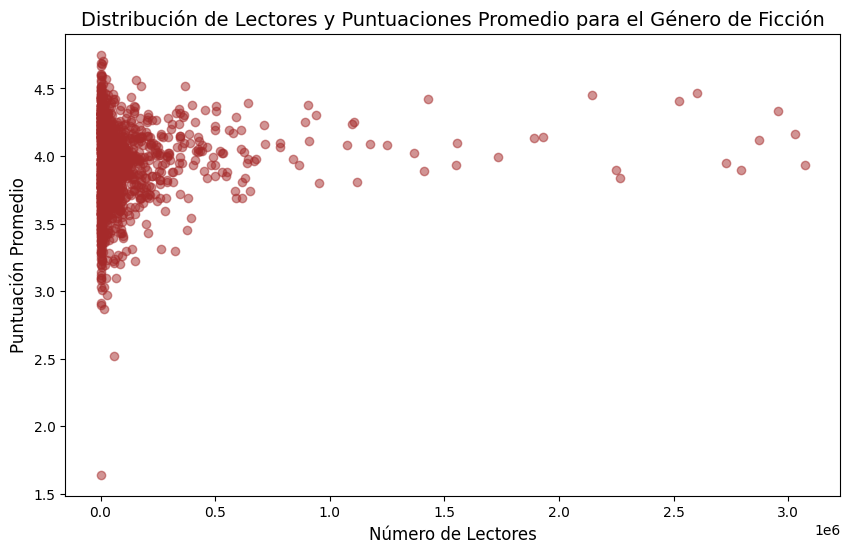

In [62]:
plt.figure(figsize=(10, 6))

# Graficar los puntos: eje X = 'Num_Ratings' (lecturas), eje Y = 'Avg_Rating' (puntuación promedio)
plt.scatter(df_fiction['Num_Ratings'], df_fiction['Avg_Rating'], color='brown', alpha=0.5)

# Título y etiquetas
plt.title('Distribución de Lectores y Puntuaciones Promedio para el Género de Ficción', fontsize=14)
plt.xlabel('Número de Lectores', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)

Hay más valores entre 1 M y 3 M en Ficción.
Las puntuaciones de Fantasy se cpncentrán entre 3,5 y 4,8 mientras que las de Ficción entre 3 y 4,6

Por lo tanto, las conclusiones dentro del género 'Fiction' son las siguientes:

* La amyoría de los libros de este género tienen un número reducido de lectores, lo que indica que la mayoría de dichos libros no son muy populares en cuanto al número de calificaciones. Sin embargo, ninguno de ellos supera los 3 millones de lectores, al contrario que en 'Fantasy'.
* La mayoría de las puntuaciones promedio oscilan entre 3,5 y 4,3, lo que implica que los libros de ficción tienden a estar bien valorados.
* En cuanto a los outliers observamos que a partir del medio millón de lectores, hay libros muy populares que presentan puntuaciones altas.
* Los libros con menos lectores tienen mayor dispersión oscilando sus puntuaciones entre 3 y 4,5, esto podría indicar que cuanto menos leído es un libro más influenciado puede estar por opiniones individuales extremas.


In [63]:
df_fiction_col = df_fiction[['Num_Ratings', 'Avg_Rating']]
correlacion = df_fiction_col['Num_Ratings'].corr(df_fiction_col['Avg_Rating'])
correlacion

np.float64(0.09465302450694096)

En este caso se podría decir que no existe correlación alguna y que podría estra plenamente influenciado  por juicios propios de valor, además de campañas de marketing, etc.

> ## 5.5 Autores más leídos en el género menos popular

In [64]:
# 1. Obtenemos un dataframe que contenga todos los libros del género Horror.
df_horror = df_goodreads[df_goodreads['Principal_Genre'] == 'Horror']

# 2. Lo ordenamos para obtener cuáles son los 5 libros más leídos.
df_horror_top5 = df_horror.sort_values(by= 'Num_Ratings', ascending = False).head(5)

df_horror_top5

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
295,295,"The Shining (The Shining, #1)",Stephen King,"['Horror', 'Fiction', 'Thriller', 'Classics', ...",4.26,1387146,Horror
320,320,It,Stephen King,"['Horror', 'Fiction', 'Thriller', 'Fantasy', '...",4.25,1026135,Horror
90,90,The Stand,Stephen King,"['Horror', 'Fiction', 'Fantasy', 'Science Fict...",4.34,722312,Horror
557,557,Carrie,Stephen King,"['Horror', 'Fiction', 'Thriller', 'Fantasy', '...",3.98,662351,Horror
637,637,Misery,Stephen King,"['Horror', 'Fiction', 'Thriller', 'Suspense', ...",4.21,637238,Horror


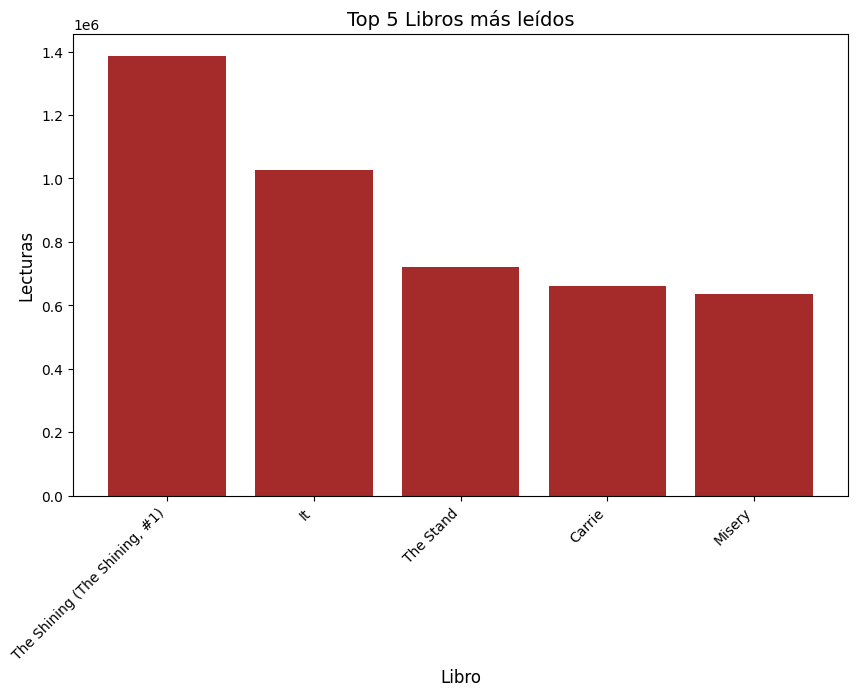

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(df_horror_top5['Book'], df_horror_top5['Num_Ratings'], color='brown')

# Títulos y etiquetas
plt.title('Top 5 Libros más leídos', fontsize=14)
plt.xlabel('Libro', fontsize=12)
plt.ylabel('Lecturas', fontsize=12)

#  Rotar los títulos de los libros para mejor visibilidad
plt.xticks(rotation=45, ha='right');

En el género 'Horror', Stephen King es el autor por autonomansia.

Pero, existen otros que también presentan gran cantidad de lectores.
A continuación, se muestran el top 5 de los autores de 'Horror' más populares en Goodreads.

In [66]:
# Autores más populares
autores_horror = df_horror.groupby('Author')['Num_Ratings'].sum().sort_values(ascending = False).head (5)
autores_horror

Author
Stephen King      10526837
Anne Rice          1071028
Thomas  Harris      992844
Dean Koontz         839528
Max Brooks          644868
Name: Num_Ratings, dtype: int64

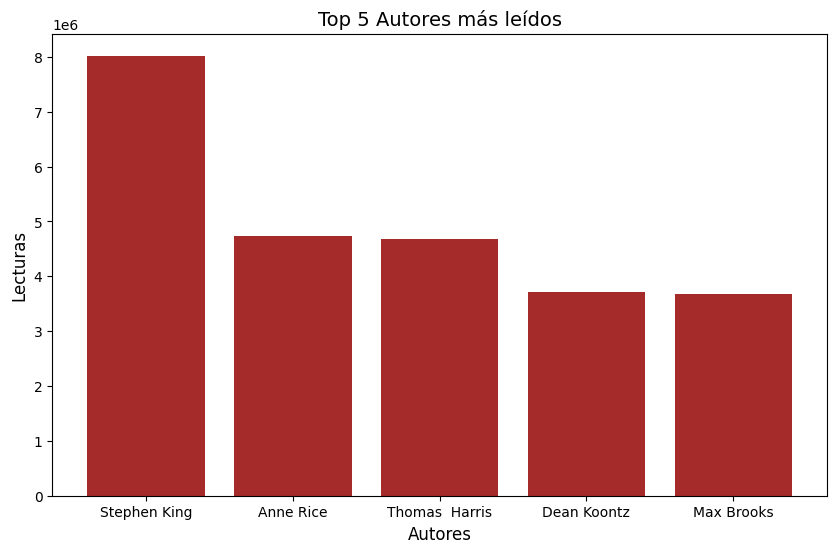

In [72]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(autores_horror.index, autores_fiction.values, color='brown')

# Títulos y etiquetas
plt.title('Top 5 Autores más leídos', fontsize=14)
plt.xlabel('Autores', fontsize=12)
plt.ylabel('Lecturas', fontsize=12);

In [67]:
# Puntuación de los autores más populares
autores_seleccionados_horror = ['Stephen King', 'Anne Rice', 'Thomas  Harris', 'Dean Koontz', 'Max Brooks']
df_autores_horror = df_horror[df_horror['Author'].isin(autores_seleccionados_horror)]
autores_horror_puntuacion = df_autores_horror.groupby('Author')['Avg_Rating'].mean().sort_values(ascending=False)
autores_horror_puntuacion

Author
Anne Rice         4.043333
Dean Koontz       3.979000
Stephen King      3.943415
Max Brooks        3.930000
Thomas  Harris    3.910000
Name: Avg_Rating, dtype: float64

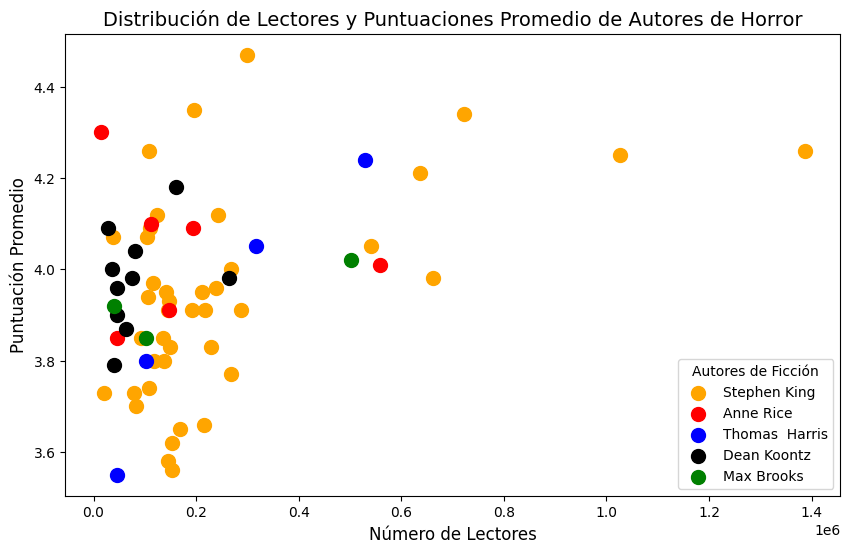

In [68]:
plt.figure(figsize=(10, 6))
colores = {'Stephen King': 'orange', 'Anne Rice': 'red','Thomas  Harris': 'blue','Dean Koontz': 'black', 'Max Brooks' : 'green'}

for autor, color in colores.items():
    df_autor_horror = df_autores_horror[df_autores_horror['Author'] == autor]
    plt.scatter(df_autor_horror['Num_Ratings'], df_autor_horror['Avg_Rating'], color=color, s=100, label=autor)

plt.title('Distribución de Lectores y Puntuaciones Promedio de Autores de Horror', fontsize=14)
plt.xlabel('Número de Lectores', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)

plt.legend(title="Autores de Ficción")

Las conslusiones obtenidas son:
1. Lo primero que se observa es que Stephen King es el autor con más publicaciones, el cual posee libros con gran cantidad de lectores y con las mejores puntuaciones de todo el género.
2. Anne Rice se mantiene entre los 50 mil y los 200 mil lectores, teniendo algún outlier de más de 500.000 lectores. sus puntuaciones se mantienen entre los 3,8 y 4,3 puntos.
3. De Thomas Harris observamos una clara correlación positiva en la que a medida que sus obras han ido recibiendo mejores puntuaciones, más lectores han tenido.
4. La obra de Dean Koontz se concentra en no estar muy bien valorada y poseer una estable puntuación entre los 3,8 y 4 puntos, teniendo algún valor excepcional por encima de dichas puntuaciones.
5. Max Brooks, es el autor que menos obras presenta concentrándose en puntuaciones entre 3,8 y 4 y no pasando de los 200 mil lectores, excepto con su Best Seller que llegó cerca de los 600 mil.

Text(0, 0.5, 'Puntuación Promedio')

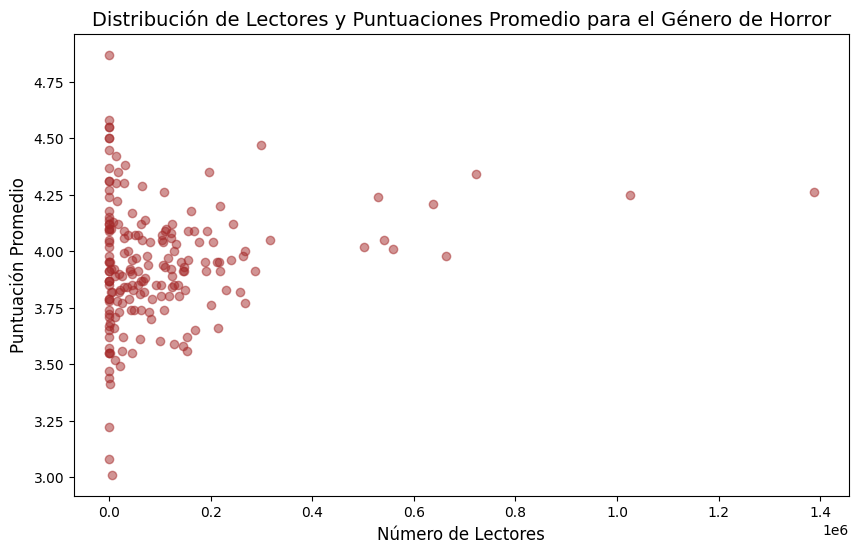

In [69]:
plt.figure(figsize=(10, 6))

# Graficar los puntos: eje X = 'Num_Ratings' (lecturas), eje Y = 'Avg_Rating' (puntuación promedio)
plt.scatter(df_horror['Num_Ratings'], df_horror['Avg_Rating'], color='brown', alpha=0.5)

# Título y etiquetas
plt.title('Distribución de Lectores y Puntuaciones Promedio para el Género de Horror', fontsize=14)
plt.xlabel('Número de Lectores', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)

Las conclusiones dentro del género 'Horror' son las siguientes:
* Existe una alta concentración de libros con pocos lectores, teniendo la mayoría menos de 200 mil.
* La puntuación promedio oscila entre 3,5 y 4,25, aunque existen valores atípicos, generalmente se califican de manera favorable.
* Los libros que tienen más lectores presentan puntuaciones más altas.
* Los libros que tienen más de 600 mil lectores tienen de puntuación promedio 4 puntos, mientras que los de menos lectores sus puntuaciones son más dispersas.
* Apenas dos libros superan el millón de lectores y son puntuados con muy buena nota.

In [70]:
df_horror_col = df_horror[['Num_Ratings', 'Avg_Rating']]
correlacion = df_horror_col['Num_Ratings'].corr(df_horror_col['Avg_Rating'])
correlacion

np.float64(0.1786543685300959)

La correlación obtenida implica que es muy débil o que no está muy clara la correlación entre ambas variables. 
Sin embargo, podemos concluir que existe un mercado con una base muy sólida de obras populares pero con una amplia variedad de libros menos conocidos los cuales se ven más influenciados por las opiniones individuales.

# Paso 6: conclusiones finales

Una vez realizados todos los análisis necesarios procedemos a recordar los objetivos y sus hipoótesis y lo compararemos con los resultados objetivos.

* El primero de nuestros objetivos era saber cuál era el género literario más leído. Nuestra hipótesis se basaba en que sería Romance y Fantasía, pero tras el análisis hemos comprobado que los géneros más leídos son Fantasía y Ficción.

* El segundo de nuestros objetivos era saber si existe alguna relación entre los género más leídos y los más públicados. Según el análisis hemos coincidido con la hipótesis que decía que sí existía, ya que la correlación se sitúa en 0,9, lo que implica que existe una fuerte correlación positiva entre ambas variabes.

* Nuestro tercer objetivo se encargaba de saber si el género literario más leído es el mejor puntuado y aunque nuestra hipótesis se basaba en que sí, tras el análisis nos encontramos con dos situaciones diferentes. En el caso del género de Fantasía sí que coincide en ser el más leído y el mejor puntuado. Sin embargo, en el caso de Ficción no es así, ya que a pesar de ser el segundo género más leído es el peor valorado, dentro de los 10 géneros más leídos, con una puntuación media de 3,94.

* En cuanto a la cuarta pregunta que consistía en si existe alguna relación entre los autores más publicados y los más leídos, obtuvimo una correlación positiva moderada. Esto significa que aunque sí que existe una relación tal y como pensábamos, hay otros factores que influyen en que un autor se lea en mayor medida.

* El quinto objetivo nos planteaba la pregunta sobre los autores más leídos en los géneros más populares. Según nuestra hipótesis pensábamos que sería Sarah J. Mass, la cual se encuentra en el top 5, pero se ve ampliamente superada en lecturas por la autora J.k. Rowling. A pesar de ello, tienen calificaciones similares.
En cuanto al segundo género más leído es muy contrario a lo pensado, ya que establecimos a Megan Maxwell o Alice Kellen como las autores de Romance más populares. Sin embargo, como hemos visto con anterioridad, el segundo género más popular es Ficción y su autor más popular es Dan Brown pero no coincide con el mejor valorado que es Taylor Jenkins Reid.

* Por último, tampoco coincidimos con la hipótesis de nuestro último objetivo que se centraba en saber el autor más popular del género menos consumido dentro del top 10 de los género más leídos. A pesar de que pensamos que el género sería poesía y que Defreds sería su autor más leído, es el género Horror el menos consumido y Stephen King como el autor más leído y casi el mejor valorado, pero le superan dos autores cuyas puntuaciones se ven beneficiadas al haber publicado escasos libros en comparación.